In [19]:
# # Make sure to install this to make the ARIMA work, comment out if already installed.
# !pip install statsmodels

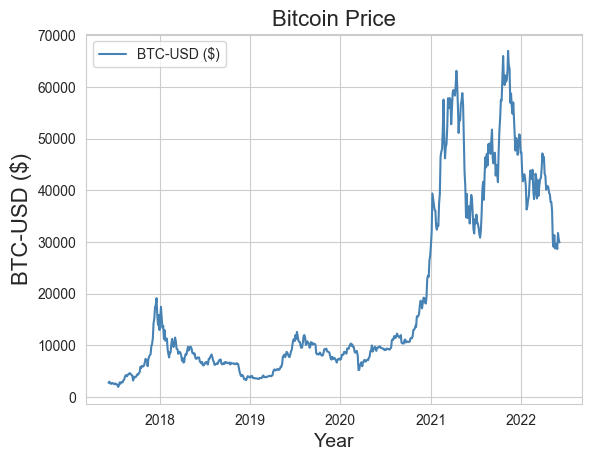

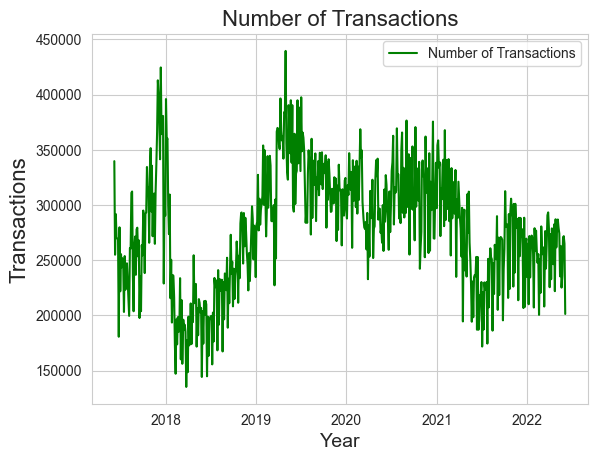

Linear Regression MSE: 271659531.900578
ARIMA MSE: 6428229.808870387


/Users/samiesaheb/tf/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samiesaheb/tf/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samiesaheb/tf/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


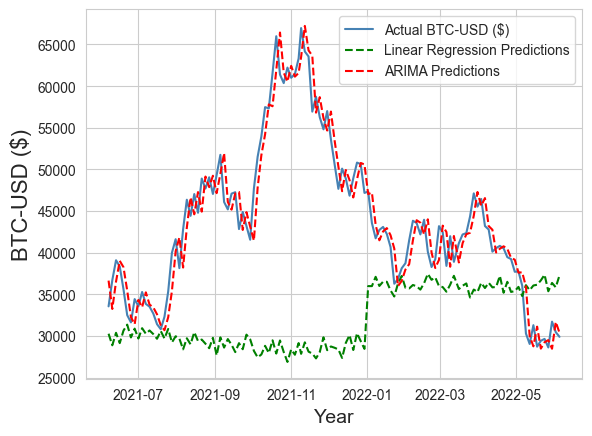

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# Read transactions data
transactions = pd.read_csv("n-transactions.txt")
transactions["Timestamp"] = pd.to_datetime(transactions["Timestamp"]).dt.date
transactions = transactions.rename(columns={"Timestamp": "Date", "n-transactions": "Transactions"})
transactions.index = transactions.pop('Date')

# Read Bitcoin price data
btc = pd.read_csv("btc.csv")
btc["Date"] = pd.to_datetime(btc["Date"])
btc.index = btc.pop("Date")
btc = btc.rename(columns={"Close": "Price"})
btc = pd.DataFrame(btc["Price"])

# Merge transactions and Bitcoin price data
df = btc.join(transactions).dropna()

# Data Preprocessing and Feature Engineering
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Weekday"] = df.index.weekday

# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")
sns.lineplot(data=df, x=df.index, y="Price", color="steelblue", label="BTC-USD ($)")
plt.xlabel("Year", fontsize=14)
plt.ylabel("BTC-USD ($)", fontsize=16)
plt.title("Bitcoin Price", fontsize=16)
plt.show()

sns.lineplot(data=df, x=df.index, y="Transactions", color="green", label="Number of Transactions")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Transactions", fontsize=16)
plt.title("Number of Transactions", fontsize=16)
plt.show()

# Model Training - Linear Regression
split = int(0.8 * len(df))
X_train, y_train = df[["Transactions", "Year", "Month", "Weekday"]][:split], df["Price"][:split]
X_test, y_test = df[["Transactions", "Year", "Month", "Weekday"]][split:], df["Price"][split:]

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Model Training - ARIMA
arima_model = ARIMA(df["Price"], order=(1, 1, 1))
arima_results = arima_model.fit()

arima_pred = arima_results.predict(start=split, end=len(df)-1, typ='levels')

# Model Evaluation
linear_mse = np.mean((linear_pred - y_test) ** 2)
arima_mse = np.mean((arima_pred - y_test) ** 2)

print("Linear Regression MSE:", linear_mse)
print("ARIMA MSE:", arima_mse)

# Visualization - Actual vs Predicted Prices
plt.plot(df.index[split:], y_test, color='steelblue', label='Actual BTC-USD ($)')
plt.plot(df.index[split:], linear_pred, color='green', linestyle='--', label='Linear Regression Predictions')
plt.plot(df.index[split:], arima_pred, color='red', linestyle='--', label='ARIMA Predictions')
plt.xlabel('Year', fontsize=14)
plt.ylabel('BTC-USD ($)', fontsize=16)
plt.legend()
plt.show()
